# Train Decision Trees After Data Preparation

In [32]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## Part 1. Load a Data Set and Save it as a Pandas DataFrame

We will work with the "cell2celltrain" data set. This version of the data set will need data preparation before it can be used for modeling.

In [ ]:
filename = os.path.join(os.getcwd(), "..", "..", "data", "cell2celltrain.csv")

In [34]:
df = pd.read_csv(filename)

####  Inspect the Data

In [35]:
df.shape

(51047, 58)

#### Define the Label

Once again, this is a binary classification problem in which we will predict customer churn. The label is the `Churn` column.

#### Identify Features

We will determine the features after we prepare our data in the section below.

## Part 2. Prepare Data

### a. Identify and Handle Missing Data

In [36]:
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

CustomerID                       0
Churn                            0
ServiceArea                     24
ChildrenInHH                     0
HandsetRefurbished               0
HandsetWebCapable                0
TruckOwner                       0
RVOwner                          0
HomeownershipKnown               0
BuysViaMailOrder                 0
RespondsToMailOffers             0
OptOutMailings                   0
NonUSTravel                      0
OwnsComputer                     0
HasCreditCard                    0
NewCellphoneUser                 0
NotNewCellphoneUser              0
OwnsMotorcycle                   0
MadeCallToRetentionTeam          0
CreditRating                     0
PrizmCode                        0
Occupation                       0
Married                      19700
MonthlyRevenue                   0
MonthlyMinutes                   0
TotalRecurringCharge             0
DirectorAssistedCalls            0
OverageMinutes                   0
RoamingCalls        

In [37]:
df = df.drop(columns='Married')

The only other column that contains missing values is the `ServiceArea` column. Let's inspect the `ServiceArea` column to get an idea of what kind of values are in this column.

In [38]:
df['ServiceArea']

0        SEAPOR503
1        PITHOM412
2        MILMIL414
3        PITHOM412
4        OKCTUL918
           ...    
51042    LAXSFN818
51043    LAXCDG310
51044    LAXCDG310
51045    NEVPOW619
51046    NEVPOW619
Name: ServiceArea, Length: 51047, dtype: object

In [39]:
df['ServiceArea'].dtype

dtype('O')

In [40]:
df['ServiceArea'] = df['ServiceArea'].fillna('unavailable')

In [41]:
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

CustomerID                   0
Churn                        0
ServiceArea                  0
ChildrenInHH                 0
HandsetRefurbished           0
HandsetWebCapable            0
TruckOwner                   0
RVOwner                      0
HomeownershipKnown           0
BuysViaMailOrder             0
RespondsToMailOffers         0
OptOutMailings               0
NonUSTravel                  0
OwnsComputer                 0
HasCreditCard                0
NewCellphoneUser             0
NotNewCellphoneUser          0
OwnsMotorcycle               0
MadeCallToRetentionTeam      0
CreditRating                 0
PrizmCode                    0
Occupation                   0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
Unanswer

### b. Perform One-Hot Encoding 

To train a decision tree model, we must first transform the string-valued categorical features into numerical boolean values using one-hot encoding.

#### Find the Columns Containing String Values

In [42]:
df.dtypes

CustomerID                     int64
Churn                           bool
ServiceArea                   object
ChildrenInHH                    bool
HandsetRefurbished              bool
HandsetWebCapable               bool
TruckOwner                      bool
RVOwner                         bool
HomeownershipKnown              bool
BuysViaMailOrder                bool
RespondsToMailOffers            bool
OptOutMailings                  bool
NonUSTravel                     bool
OwnsComputer                    bool
HasCreditCard                   bool
NewCellphoneUser                bool
NotNewCellphoneUser             bool
OwnsMotorcycle                  bool
MadeCallToRetentionTeam         bool
CreditRating                  object
PrizmCode                     object
Occupation                    object
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
R

In [43]:
to_encode = ['ServiceArea', 'CreditRating', 'PrizmCode', 'Occupation']

In [44]:
df[to_encode].nunique()

ServiceArea     748
CreditRating      7
PrizmCode         4
Occupation        8
dtype: int64

Notice that all of the columns except for `ServiceArea` contain a small number of unique values. For these columns, it should be straightforward to use one-hot encoding to replace the column with a set of new binary columns for each unique value. 

However, `ServiceArea` contains a large number of unique values. Let's first deal with the special case of `ServiceArea`.

#### One Hot-Encoding 'ServiceArea': The Top 10 Values

Notice that column `ServiceArea` has 747 potential values. This means we would have to create 747 new binary indicator columns - one column per unique value. That is too many!

Transforming this many categorical values would slow down the computation down the line. One thing we could do is to see if some of the values in `ServiceArea` are occurring frequently. We will then one-hot encode just those frequent values. Let's one-hot encode only the top ten most frequent values in column `ServiceArea`. 

In [45]:
top_10_SA = list(df['ServiceArea'].value_counts().head(10).index)

top_10_SA

['NYCBRO917',
 'HOUHOU281',
 'DALDAL214',
 'NYCMAN917',
 'APCFCH703',
 'DALFTW817',
 'SANSAN210',
 'APCSIL301',
 'SANAUS512',
 'SFROAK510']

Now that we have obtained the ten most frequent values for `ServiceArea`, let's use one-hot encoding to transform DataFrame `df` to represent these values numerically.

In [46]:
for value in top_10_SA:
    df['ServiceArea_'+ value] = np.where(df['ServiceArea']==value,1,0)

In [47]:
df.drop(columns = 'ServiceArea', inplace=True)
to_encode = ['CreditRating', 'PrizmCode', 'Occupation']

Inspect DataFrame `df` and see the new columns and their values.

In [48]:
df.columns

Index(['CustomerID', 'Churn', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'HomeownershipKnown',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'OwnsMotorcycle', 'MadeCallToRetentionTeam',
       'CreditRating', 'PrizmCode', 'Occupation', 'MonthlyRevenue',
       'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls',
       'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes',
       'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls',
       'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls',
       'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut',
       'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls',
       'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets',
       'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
      

In [49]:
df.head()

,CustomerID,Churn,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,HomeownershipKnown,BuysViaMailOrder,RespondsToMailOffers,...,ServiceArea_NYCBRO917,ServiceArea_HOUHOU281,ServiceArea_DALDAL214,ServiceArea_NYCMAN917,ServiceArea_APCFCH703,ServiceArea_DALFTW817,ServiceArea_SANSAN210,ServiceArea_APCSIL301,ServiceArea_SANAUS512,ServiceArea_SFROAK510
0,3000002,True,False,False,True,False,False,True,True,True,...,0,0,0,0,0,0,0,0,0,0
1,3000010,True,True,False,False,False,False,True,True,True,...,0,0,0,0,0,0,0,0,0,0
2,3000014,False,True,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,3000022,False,False,False,True,False,False,True,True,True,...,0,0,0,0,0,0,0,0,0,0
4,3000026,True,False,False,False,False,False,True,True,True,...,0,0,0,0,0,0,0,0,0,0


Let's inspect column `ServiceArea_DALDAL214` in row 47. Remember, it should have a value of 1.

In [50]:
df.loc[47]['ServiceArea_DALDAL214']

1

#### One Hot-Encode all Remaining Columns

All other columns in `to_encode` have reasonably small numbers of unique values, so we are going to simply one-hot encode every unique value of those columns.


In [51]:
for col in to_encode:
    df_encoded = pd.get_dummies(df[col], prefix=col)
    df = df.join(df_encoded)

In [52]:
df.head()

,CustomerID,Churn,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,HomeownershipKnown,BuysViaMailOrder,RespondsToMailOffers,...,PrizmCode_Suburban,PrizmCode_Town,Occupation_Clerical,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student
0,3000002,True,False,False,True,False,False,True,True,True,...,True,False,False,False,False,False,True,False,False,False
1,3000010,True,True,False,False,False,False,True,True,True,...,True,False,False,False,False,False,True,False,False,False
2,3000014,False,True,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
3,3000022,False,False,False,True,False,False,True,True,True,...,False,False,False,False,False,True,False,False,False,False
4,3000026,True,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,True,False,False,False


In [53]:
for col in to_encode:
    df = df.drop(columns=col)

In [54]:
df.shape

(51047, 82)

In [55]:
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

CustomerID                 0
Churn                      0
ChildrenInHH               0
HandsetRefurbished         0
HandsetWebCapable          0
                          ..
Occupation_Other           0
Occupation_Professional    0
Occupation_Retired         0
Occupation_Self            0
Occupation_Student         0
Length: 82, dtype: int64

#### Identify Features
Let's inspect the transformed DataFrame `df`. These will be our features.

In [56]:
list(df.loc[:, df.columns != 'Churn'])

['CustomerID',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'HomeownershipKnown',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'OwnsMotorcycle',
 'MadeCallToRetentionTeam',
 'MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'DroppedCalls',
 'BlockedCalls',
 'UnansweredCalls',
 'CustomerCareCalls',
 'ThreewayCalls',
 'ReceivedCalls',
 'OutboundCalls',
 'InboundCalls',
 'PeakCallsInOut',
 'OffPeakCallsInOut',
 'DroppedBlockedCalls',
 'CallForwardingCalls',
 'CallWaitingCalls',
 'MonthsInService',
 'UniqueSubs',
 'ActiveSubs',
 'Handsets',
 'HandsetModels',
 'CurrentEquipmentDays',
 'AgeHH1',
 'AgeHH2',
 'RetentionCalls',
 'RetentionOffersAccepted',
 'ReferralsMadeBySubscriber',
 'IncomeGroup',
 'AdjustmentsToCr

## Part 3. Create Labeled Examples from the Data Set 

In [57]:
y = df['Churn']
X = df.drop(columns='Churn')

## Part 4.  Create Training and Test Data Sets

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [59]:
print(X_train.shape)
print(X_test.shape)

(35732, 81)
(15315, 81)


## Part 5. Train Decision Tree Classifiers and Evaluate Their Performances

In [60]:
def train_test_DT(X_train, X_test, y_train, y_test, depth, leaf=9, crit='entropy'):
    '''
    Fit a Decision Tree classifier to the training data X_train, y_train.
    Return the accuracy of resulting predictions on the test set.
    Parameters:
        depth := The maximum depth of the tree
        leaf := The minimum number of samples required to be at a leaf node. 
            We have assigned a default value of 1 to the leaf parameter
        crit := The function to be used to measure the quality of a split. 
            We have assigned a default value of 'entropy' to the crit parameter. Note that
            scikit-learn's default value is gini.
    '''
    
     # 1. Create the  Scikit-learn DecisionTreeClassifier model object below and assign to 
     # variable 'model'
    model = DecisionTreeClassifier(criterion=crit, max_depth=depth, min_samples_leaf=leaf)
  
    # 2. Fit the model to the training data below
    model.fit(X_train, y_train)

    # 3. Make predictions on the test data and assign the result to the 
        # variable 'class_label_predictions' below
    class_label_predictions = model.predict(X_test)

    # 4. Compute the accuracy and save the result to the variable 'acc_score' below
    acc_score = accuracy_score(y_test, class_label_predictions)
    
    return acc_score

#### Train Decision Tree Classifiers Using Different Hyperparameter Values

In [61]:
depth1= 1
depth2 = 10

max_depth_range = []
acc = []

for md in range(depth1, depth2 + 1):
    score = train_test_DT(X_train, X_test, y_train, y_test, depth = md)
    max_depth_range.append(md)
    print('Max Depth=' + str(md) + ', accuracy score: ' + str(score))
    acc.append(float(score))

Max Depth=1, accuracy score: 0.7107411034933072
Max Depth=2, accuracy score: 0.7107411034933072
Max Depth=3, accuracy score: 0.7138752856676461
Max Depth=4, accuracy score: 0.7143323539014038
Max Depth=5, accuracy score: 0.7155729676787463
Max Depth=6, accuracy score: 0.7128305582761998
Max Depth=7, accuracy score: 0.7128305582761998
Max Depth=8, accuracy score: 0.7099575579497225
Max Depth=9, accuracy score: 0.7054521710741104
Max Depth=10, accuracy score: 0.7047992164544564


<>:6: SyntaxWarning: invalid escape sequence '\_'
<>:6: SyntaxWarning: invalid escape sequence '\_'
/var/folders/hw/cs9r1s7d1g17952tm8lznrjw0000gn/T/ipykernel_28979/1716632003.py:6: SyntaxWarning: invalid escape sequence '\_'
  plt.title('Test set accuracy of the DT predictions, for $max\_depth\in\{8, 32\}$')


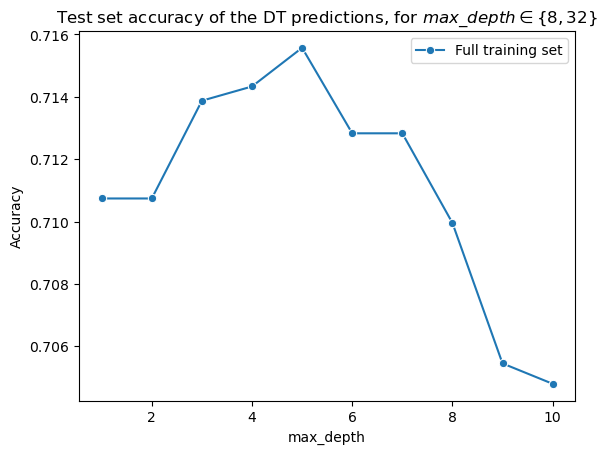

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111)

p = sns.lineplot(x=max_depth_range, y=acc, marker='o', label = 'Full training set')

plt.title('Test set accuracy of the DT predictions, for $max\_depth\in\{8, 32\}$')
ax.set_xlabel('max_depth')
ax.set_ylabel('Accuracy')
plt.show()